# Movie Genre Classifier

## 1. Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Loading the Train and Test Datasets

In [2]:
df_Train = pd.read_csv('train_data.txt', sep = ':::', names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine = 'python')
df_Train

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
df_Test = pd.read_csv('test_data.txt', sep = ':::', names = ['ID', 'TITLE', 'DESCRIPTION'], engine = 'python')
df_Test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
df_Testsol = pd.read_csv('test_data_solution.txt', sep = ':::', names = ['ID', 'TITLE', 'GENRE','DESCRIPTION'], engine = 'python')
df_Testsol

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


## 3. Data Visualization

### i) Number of movies in each genre

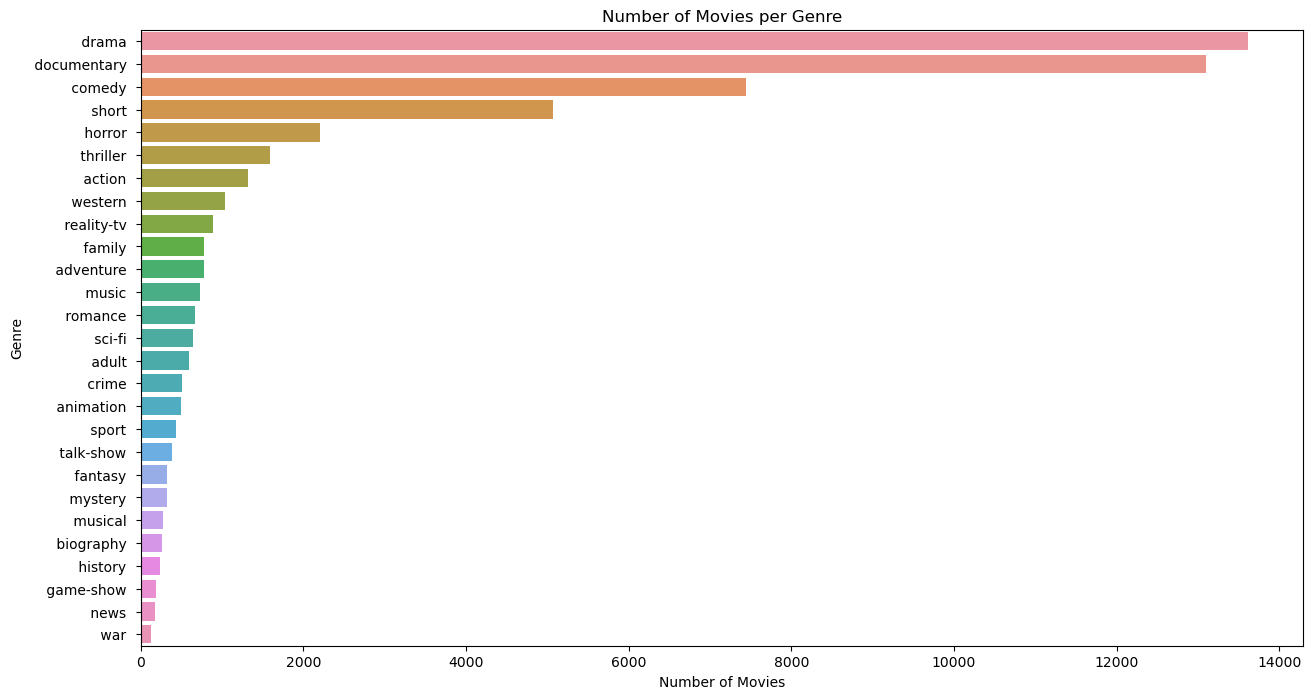

In [5]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df_Train['GENRE'], order=df_Train['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### ii) Percentage Distribution of movies in each genre

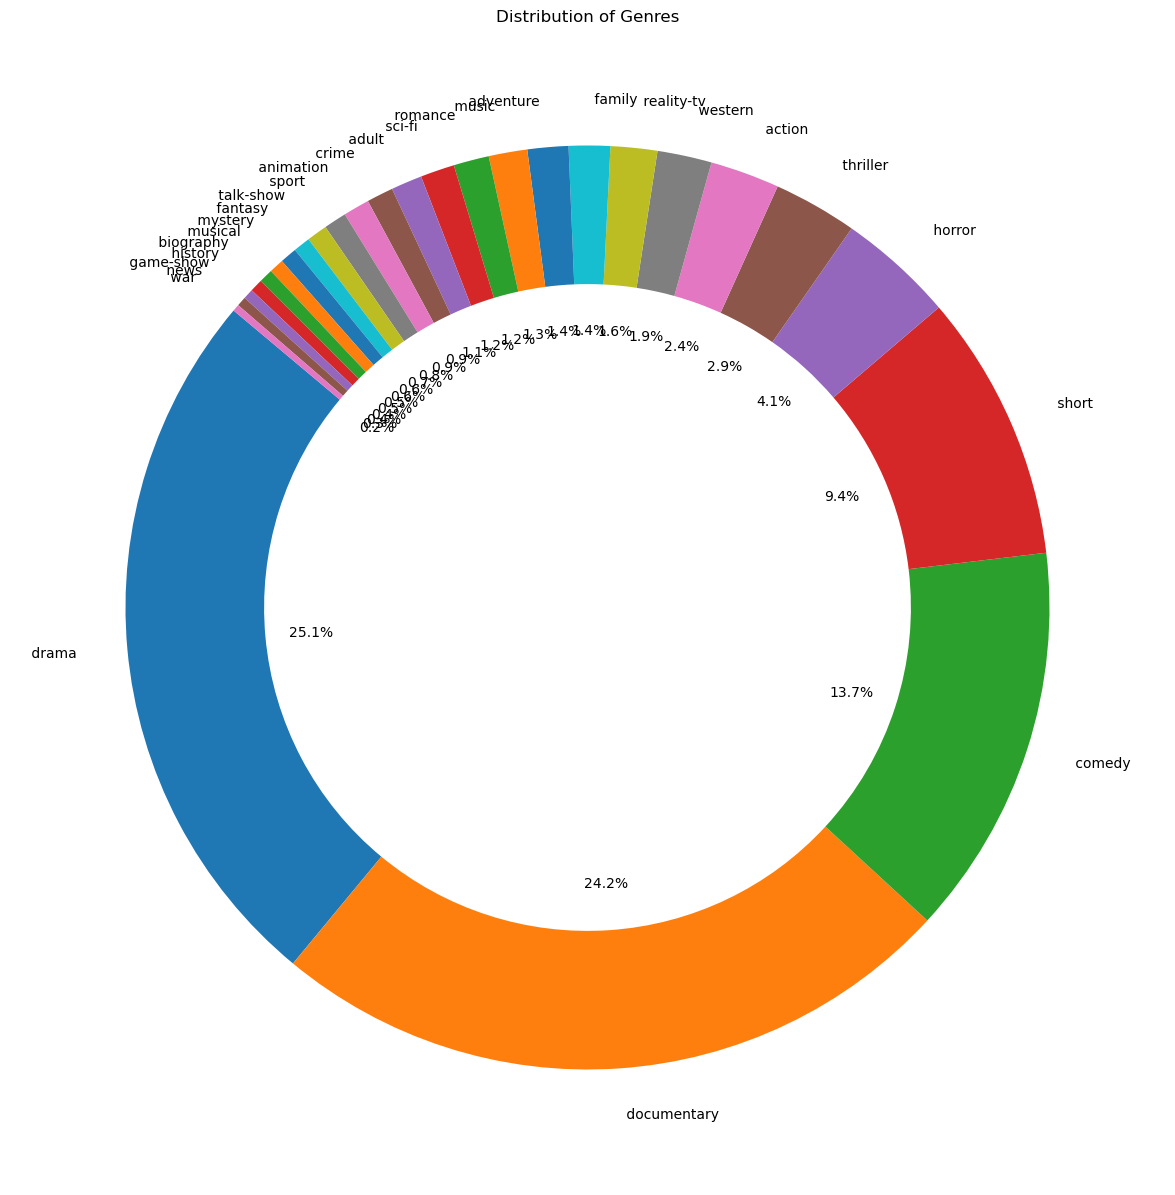

In [6]:
genre_counts = df_Train['GENRE'].value_counts()
plt.figure(figsize=(20, 15))
plt.pie(genre_counts, labels=genre_counts.index, startangle=140, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Distribution of Genres')
plt.show()

### iii) Description Length of movies in each genre

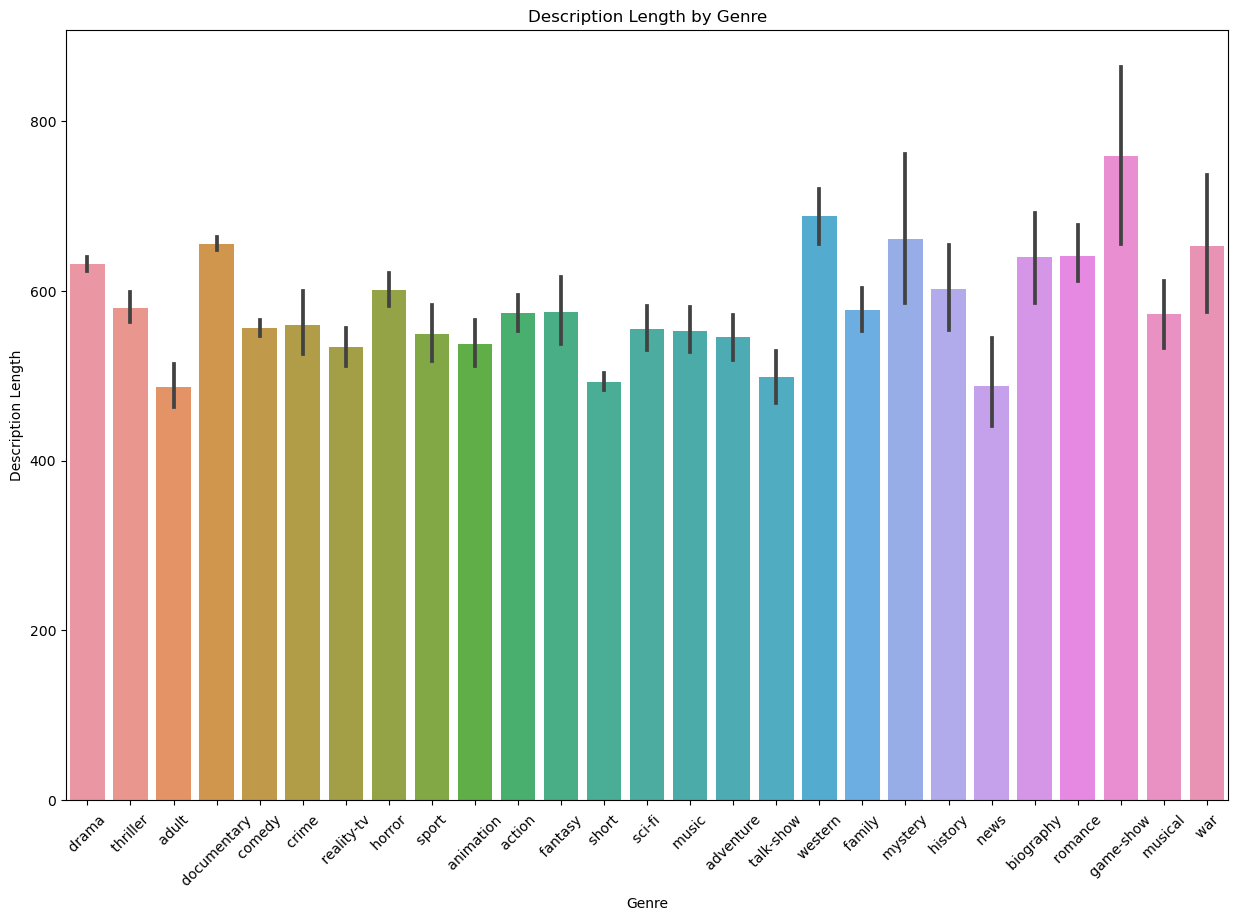

In [7]:
df_Train['DESCRIPTION_length'] = df_Train['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=df_Train)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

## 4. Data preprocessing

In [8]:
df_Train.isna().sum()

ID                    0
TITLE                 0
GENRE                 0
DESCRIPTION           0
DESCRIPTION_length    0
dtype: int64

In [9]:
df_Test.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = tfidf_vectorizer.fit_transform(df_Train['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(df_Test['DESCRIPTION'])

In [11]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_Train['GENRE'])
y_test = label_encoder.transform(df_Testsol['GENRE'])

In [12]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 5. Classification

### i) Linear Support Vector Machine

In [13]:
classifier_svc = LinearSVC()
classifier_svc.fit(X_train_sub, y_train_sub)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [14]:
y_val_pred_svc = classifier_svc.predict(X_val)
y_val_pred_svc

array([ 5,  8,  0, ...,  8, 21,  7])

In [15]:
svc_score = accuracy_score(y_val, y_val_pred_svc)
svc_score

0.5662639490915798

In [16]:
y_pred_svc = classifier_svc.predict(X_test)
y_pred_svc

array([ 5,  8,  7, ...,  5, 13,  8])

In [18]:
svc_pred_score = accuracy_score(y_test, y_pred_svc)
print("SVC CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",svc_pred_score)
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred_svc))
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_test, y_pred_svc))

SVC CLASSIFICATION REPORT:
ACCURACY SCORE:  0.5662361623616237
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.39      0.31      0.35      1314
           1       0.58      0.37      0.45       590
           2       0.40      0.22      0.29       775
           3       0.34      0.14      0.20       498
           4       0.00      0.00      0.00       264
           5       0.52      0.57      0.55      7446
           6       0.26      0.08      0.12       505
           7       0.69      0.80      0.74     13096
           8       0.56      0.69      0.62     13612
           9       0.30      0.15      0.20       783
          10       0.23      0.06      0.10       322
          11       0.77      0.60      0.67       193
          12       0.12      0.01      0.02       243
          13       0.60      0.61      0.60      2204
          14       0.59      0.49      0.54       731
          15       0.26      0.07      0.11     

### ii) Naive Bayes Classifcation

In [19]:
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred_nb = classifier_nb.predict(X_test)
y_pred_nb

array([8, 8, 7, ..., 8, 8, 7])

In [25]:
nb_pred_score = accuracy_score(y_test, y_pred_nb)
print("NAIVE BAYES CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",nb_pred_score)
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred_nb))
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_test, y_pred_nb))

NAIVE BAYES CLASSIFICATION REPORT:
ACCURACY SCORE:  0.5215682656826568
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.58      0.06      0.11      1314
           1       0.54      0.05      0.10       590
           2       0.81      0.07      0.13       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.53      0.43      0.48      7446
           6       0.00      0.00      0.00       505
           7       0.57      0.88      0.69     13096
           8       0.46      0.84      0.59     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.97      0.19      0.31       193
          12       0.00      0.00      0.00       243
          13       0.73      0.31      0.43      2204
          14       0.95      0.05      0.10       731
          15       0.00      0.00      0

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### iii) Logistic Regression

In [26]:
classifier_lr = LogisticRegression(max_iter=1000)
classifier_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred_lr = classifier_lr.predict(X_test)
y_pred_lr

array([8, 8, 7, ..., 5, 8, 7])

In [28]:
lr_pred_score = accuracy_score(y_test, y_pred_lr)
print("LOGISTIC REGRESSION REPORT:")
print("ACCURACY SCORE: ",lr_pred_score)
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred_lr))
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_test, y_pred_lr))

LOGISTIC REGRESSION REPORT:
ACCURACY SCORE:  0.5890959409594096
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.51      0.29      0.37      1314
           1       0.63      0.25      0.35       590
           2       0.65      0.16      0.26       775
           3       0.53      0.05      0.10       498
           4       0.00      0.00      0.00       264
           5       0.54      0.59      0.57      7446
           6       0.37      0.03      0.06       505
           7       0.67      0.86      0.75     13096
           8       0.54      0.78      0.64     13612
           9       0.53      0.10      0.16       783
          10       0.50      0.04      0.07       322
          11       0.91      0.49      0.64       193
          12       0.00      0.00      0.00       243
          13       0.66      0.58      0.62      2204
          14       0.69      0.44      0.54       731
          15       0.42      0.02      0.03    

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### iv) SGD Classification

In [29]:
classifier_sgd = SGDClassifier()
classifier_sgd.fit(X_train, y_train)

SGDClassifier()

In [32]:
y_pred_sgd = classifier_sgd.predict(X_test)
y_pred_sgd

array([ 8,  8,  7, ...,  5, 13,  7])

In [33]:
sgd_pred_score = accuracy_score(y_test, y_pred_svm)
print("SGD CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",sgd_pred_score)
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred_sgd))
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_test, y_pred_sgd))

SGD CLASSIFICATION REPORT:
ACCURACY SCORE:  0.5726568265682657
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.44      0.24      0.31      1314
           1       0.58      0.35      0.43       590
           2       0.47      0.17      0.25       775
           3       0.32      0.09      0.14       498
           4       0.00      0.00      0.00       264
           5       0.58      0.50      0.54      7446
           6       0.24      0.05      0.09       505
           7       0.62      0.90      0.73     13096
           8       0.54      0.77      0.64     13612
           9       0.38      0.08      0.13       783
          10       0.20      0.05      0.08       322
          11       0.63      0.73      0.67       193
          12       0.00      0.00      0.00       243
          13       0.57      0.64      0.60      2204
          14       0.59      0.38      0.46       731
          15       0.24      0.03      0.05     